# これは何？  
pythonで機械学習するためのチュートリアルです.csvファイルの読み込み方，機械学習ライブラリの使い方，図のプロットのしかたがわかるように作りました．  
上から順に実行していけば良いはずです．途中で動かなかったらライブラリが入ってない可能性があります．  
わからないところがあったらまずはそこの関数名でググってみてください．

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline

# データ整形

In [2]:
data = pd.read_csv("tutorial.csv",encoding="shift-jis",na_values="")
print("データの形")
print(data.shape)
data.head()

データの形
(29918, 11)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29


In [3]:
#Nullチェック
data.isnull().sum()

racekey               0
horse_number          0
horse_name            0
order_of_finish       0
popularity            0
horse_weight          0
tanshou_odds          0
hukushou_odds         0
tanshou_odds_at10     0
hukushou_odds_at10    0
IDM                   0
dtype: int64

各列の値をチェックしてみる

In [4]:
data["order_of_finish"].value_counts()

1     2081
2     2038
3     2036
4     2036
5     2030
6     2030
7     2029
8     2024
9     1994
10    1922
11    1824
12    1722
13    1573
14    1404
15    1213
16     936
       324
0      306
17     221
18     175
Name: order_of_finish, dtype: int64

In [5]:
data["popularity"].value_counts()

5     2049
3     2049
2     2048
4     2046
6     2045
7     2041
1     2040
8     2034
9     1997
10    1949
11    1843
12    1739
13    1598
14    1428
15    1235
16     974
17     229
18     193
0      111
80      14
20      13
70      13
40      12
71      11
50      10
21       9
31       9
91       8
19       8
51       8
      ... 
39       2
75       2
86       2
33       2
25       2
69       2
58       2
97       2
64       2
96       2
98       2
32       2
88       2
65       2
77       2
46       1
72       1
94       1
74       1
45       1
52       1
89       1
53       1
95       1
76       1
59       1
28       1
48       1
26       1
         1
Name: popularity, Length: 89, dtype: int64

In [6]:
data["horse_weight"].value_counts()

470    865
480    806
472    798
478    773
464    767
468    756
476    756
474    747
466    742
460    722
462    718
482    705
454    698
484    693
456    691
486    686
458    681
450    661
452    654
488    652
490    641
448    601
444    592
492    586
446    551
496    541
494    533
500    524
498    510
442    501
      ... 
751      1
362      1
665      1
52       1
949      1
148      1
212      1
324      1
596      1
612      1
644      1
900      1
165      1
245      1
453      1
645      1
150      1
153      1
310      1
582      1
598      1
854      1
950      1
551      1
647      1
951      1
24       1
264      1
360      1
375      1
Name: horse_weight, Length: 231, dtype: int64

In [7]:
data["horse_weight"].value_counts()

470    865
480    806
472    798
478    773
464    767
468    756
476    756
474    747
466    742
460    722
462    718
482    705
454    698
484    693
456    691
486    686
458    681
450    661
452    654
488    652
490    641
448    601
444    592
492    586
446    551
496    541
494    533
500    524
498    510
442    501
      ... 
751      1
362      1
665      1
52       1
949      1
148      1
212      1
324      1
596      1
612      1
644      1
900      1
165      1
245      1
453      1
645      1
150      1
153      1
310      1
582      1
598      1
854      1
950      1
551      1
647      1
951      1
24       1
264      1
360      1
375      1
Name: horse_weight, Length: 231, dtype: int64

いくつかの問題点  
1.想定してないものが入っている時がある（元のDBを見てみるとtanshou_oddsに文字が入ってたりしている)　　
2.人気順がおかしい(0とか80とか)行がある  
3.馬体重がおかしい（50kgとか900kgとか)行がある  
対処  
1.数字以外を含む行は消す
2.1~18以外の数字の行を削除(適当)  
3.今回は触らないことにする

In [8]:
#該当列数字以外の行を削除
data = data[data["order_of_finish"].str.contains("(\d)+")]
data = data[data["popularity"].str.contains("(\d)+")]
data = data[data["tanshou_odds"].str.contains("(\d)+")]
print(data.shape)

(29488, 11)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [9]:
#文字列を数値に変換した行を作る
data.loc[:,"order_of_finish_num"] = data.loc[:,"order_of_finish"].astype(int)
data.loc[:,"popularity_num"] = data.loc[:,"popularity"].astype(int)
data.loc[:,"horse_weight_num"] = data.loc[:,"horse_weight"].astype(int)
data.loc[:,"tanshou_odds_num"] = data.loc[:,"tanshou_odds"].astype(float)

print(data.shape)
data.head()

(29488, 15)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,2,4,412,15.8
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,6,2,418,6.9
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,8,9,458,145.4
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,7,5,408,19.8
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,4,8,442,102.3


In [10]:
#2の処理
data =  data.loc[(data.loc[:,"popularity_num"]>=1) & (data.loc[:,"popularity_num"]<=18),:]
print(data.shape)

(29389, 15)


In [11]:
data.head()

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,2,4,412,15.8
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,6,2,418,6.9
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,8,9,458,145.4
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,7,5,408,19.8
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,4,8,442,102.3


単勝した馬とそうでない馬を示すtanshou_flagをつくる

In [12]:
data.loc[:,"tanshou_flag"] = (data.loc[:,"order_of_finish_num"] == 1)
data.head(20)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,2,4,412,15.8,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,6,2,418,6.9,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,8,9,458,145.4,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,7,5,408,19.8,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,4,8,442,102.3,False
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,28,3,3,460,14.5,False
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,21,5,7,452,97.2,False
7,216220108,1410112620160710,キップヨシ,0,6,470,49.9,3.8,26.4,4.8,,0,6,470,49.9,False
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,36,1,1,492,1.1,True
9,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,31,8,9,484,61.9,False


正規化しておく  
追記：正規化すると良くなかったのでしない

In [13]:
"""from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data.loc[:,"horse_weight_s"] = sc.fit_transform(data.loc[:,"horse_weight_num"])
data.loc[:,"popularity_s"] = sc.fit_transform(data.loc[:,"popularity_num"])
"""

'from sklearn.preprocessing import MinMaxScaler\nsc = MinMaxScaler()\ndata.loc[:,"horse_weight_s"] = sc.fit_transform(data.loc[:,"horse_weight_num"])\ndata.loc[:,"popularity_s"] = sc.fit_transform(data.loc[:,"popularity_num"])\n'

In [14]:
data.head()

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,2,4,412,15.8,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,6,2,418,6.9,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,8,9,458,145.4,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,7,5,408,19.8,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,4,8,442,102.3,False


# 学習

popularity,horse_weightからtanshou_flagを予測してみる  
まず，テストデータとトレインデータに分割する(2:8)

In [20]:
features = ["popularity_num","horse_weight_num"]
target = ["tanshou_flag"]

X = data
y = data.loc[:,target]
print("デザインマトリックスの形")
print(X.shape)
print("ラベルマトリックス")
print(y.shape)

デザインマトリックスの形
(29389, 16)
ラベルマトリックス
(29389, 1)


In [21]:
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("トレインデータ")
print(data_train.shape)
print(y_train.shape)
print("テストデータ")
print(data_test.shape)
print(y_test.shape)

トレインデータ
(23511, 16)
(23511, 1)
テストデータ
(5878, 16)
(5878, 1)


In [22]:
#学習に使う列だけ選択
X_train = data_train.loc[:,features]
X_test = data_test.loc[:,features]

In [23]:
#DataFrameのまま扱うとindexが保持されて便利
X_train.head()

,popularity_num,horse_weight_num
9467,13,464
11373,13,472
2285,8,492
7872,5,418
8997,8,462


In [24]:
#tutrial http://scikit-learn.org/stable/modules/svm.html
# SVC()の説明　http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
clf = svm.SVC()
clf.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 評価

In [25]:
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print("train dataのscore:", train_score)
print("test dataのscore:", test_score)

train dataのscore: 0.932074348177
test dataのscore: 0.927696495407



コンフュージョンマトリックスを描いてみる

In [26]:
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)

In [27]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    23454
True        57
dtype: int64
test data の　予測の内訳
False    5865
True       13
dtype: int64


In [28]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21874    17]
 [ 1580    40]]
confusion_matrix in test
[[5447    7]
 [ 418    6]]


In [29]:

tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.701754385965
テストデータでの精度＝ 0.461538461538


以下回収率の計算

In [30]:

data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
print(data_train.shape)
data_train.head()

(23511, 17)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
9467,1016160904,1110402520160228,ビアンコカンドーレ,16,13,464,47,8.2,16.3,4.5,44,16,13,464,47.0,False,False
11373,916161101,1310612920160313,サルドナ,7,13,472,69.6,10.3,73.8,8.8,49,7,13,472,69.6,False,False
2285,316260303,1310589920160717,バーニングマン,11,8,492,40.8,4.1,28.6,3.7,15,11,8,492,40.8,False,False
7872,916370903,1210242220160625,ラバニーユ,5,5,418,12.6,2,10.5,2.2,53,5,5,418,12.6,False,False
8997,616220101,1310513220160228,カラカ,3,8,462,69.4,5.7,46.2,5.7,36,3,8,462,69.4,False,False


In [31]:
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
print(data_test.shape)
data_test.head()

(5878, 17)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
14329,116151102,1010440720160813,タガノエンブレム,10,9,466,28.4,4.7,20.9,5.1,53,10,9,466,28.4,False,False
13460,516581101,1210201320161127,キタサンブラック,1,1,536,3.8,1.3,3.9,1.5,79,1,1,536,3.8,True,False
23765,615190906,1110348320150125,マドリードカフェ,4,4,510,12.6,3,13.4,3,54,4,4,510,12.6,False,False
5258,716450612,1410575020161217,チェアーグライド,5,9,516,23.9,3.4,21.3,4,33,5,9,516,23.9,False,False
26040,1015270814,1010513320150822,メイショウグレア,14,8,434,23.1,3.1,33.8,4.6,41,14,8,434,23.1,False,False


In [32]:
#単勝した馬のみのデータ
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
print(data_train_T.shape)
data_train_T.head()

(1620, 17)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
27573,515560904,1310455020151122,トウショウドラフタ,1,2,460,2.9,1.1,3,1.3,48,1,2,460,2.9,True,False
21919,515520106,1310550520151108,ナイトインブラック,1,1,484,2.5,1.2,3.1,1.2,40,1,1,484,2.5,True,False
26342,915340402,810431620150614,オールアズワン,1,2,508,2.8,1.4,3,2.1,,1,2,508,2.8,True,False
29867,815180906,910048320150124,タマモトッププレイ,1,9,496,23,5,12.5,3.2,59,1,9,496,23.0,True,False
23840,715140203,1110432120150125,サトノセレリティ,1,1,484,2.6,1.2,3.6,1.3,48,1,1,484,2.6,True,False


In [33]:
#そのなかで単勝すると予測したデータ
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]
print(data_train_TP.shape)
data_train_TP.head()

(40, 17)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
9619,516120611,1110394120160131,エルズミーア,1,1,564,2,1.1,2.5,1.3,54,1,1,564,2.0,True,True
10876,816431101,1210201320161010,キタサンブラック,1,1,538,1.8,1.1,1.9,1.1,76,1,1,538,1.8,True,True
16296,616241001,1011001320160306,レッドルーファス,1,10,651,33.,4,8 20.,2 3.,7 5,1,10,651,33.0,True,True
26790,315261213,1210597920150719,パワーポケット,1,1,520,2.7,1.2,3.1,1.2,56,1,1,520,2.7,True,True
18696,315120703,1210022520150412,ウインマハロ,1,2,416,3,1.2,4,1.3,40,1,2,416,3.0,True,True


In [34]:
#TPの単勝オッズの合計/単勝と予測したデータ数
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 10.222807017543861


データがいくつかおかしい

In [35]:
data_train_TP["tanshou_odds_num"]

9619       2.0
10876      1.8
16296     33.0
26790      2.7
18696      3.0
15459      2.1
23985      2.5
11728      3.4
11215      3.6
13298    342.0
20781      2.2
6029       2.3
21376     99.0
5378       1.7
13587      2.6
8015       1.8
8288       5.6
10300      1.3
5981       2.4
21461      3.0
16800      3.7
16248      1.7
8068       4.9
6993       2.0
3187       2.5
3889       1.4
7605       2.0
7547       1.7
3468       4.3
20684      4.6
1087       4.6
12420     10.2
27650      2.8
9739       3.7
20712      2.3
18351      1.8
9693       3.6
9198       2.1
20802      3.4
21404      1.4
Name: tanshou_odds_num, dtype: float64

In [36]:
data_train_TP.loc[13298,:]

racekey                         916581113
horse_number              910262020161224
horse_name             ゴールデンナンバー　　　　　　　　　
order_of_finish                         1
popularity                              1
horse_weight                          324
tanshou_odds                       　 342.
hukushou_odds                            
tanshou_odds_at10                        
hukushou_odds_at10                       
IDM                                     5
order_of_finish_num                     1
popularity_num                          1
horse_weight_num                      324
tanshou_odds_num                      342
tanshou_flag                         True
predict                              True
Name: 13298, dtype: object

In [37]:
data_train_TP.loc[21376,:]

racekey                         615541105
horse_number              810049520151213
horse_name             サクラアドニス　　　　　　　　　　　
order_of_finish                         1
popularity                              1
horse_weight                          645
tanshou_odds                       　  99.
hukushou_odds                          20
tanshou_odds_at10                  7  52.
hukushou_odds_at10                 6  13.
IDM                                   6 4
order_of_finish_num                     1
popularity_num                          1
horse_weight_num                      645
tanshou_odds_num                       99
tanshou_flag                         True
predict                              True
Name: 21376, dtype: object

In [38]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(424, 17)
(6, 17)
test dataの回収率は 1.3230769230769233


In [39]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
26822,715360304,1210422920150719,ミッキーオリビエ,1,1,538,2.7,1.2,2.4,1.1,49,1,1,538,2.7,True,True
13781,416170909,1111009420160521,ザンブローネ,1,2,558,3.2,1.4,6.5,2,53,1,2,558,3.2,True,True
24895,515321209,1110654420150607,メガオパールカフェ,1,1,538,2.5,1.2,3.4,1.5,60,1,1,538,2.5,True,True
6166,816270710,1110608820160220,アーブル,1,1,520,3,1.5,3.8,1.1,53,1,1,520,3.0,True,True
19752,415330801,1110261120151024,タマモマズルカ,1,1,528,3.7,1.6,4.6,1.9,53,1,1,528,3.7,True,True
19951,515461009,1211009120151024,モーニン,1,1,520,2.1,1.1,2.6,1.3,69,1,1,520,2.1,True,True


あれ？回収率1超えた？(要調査)

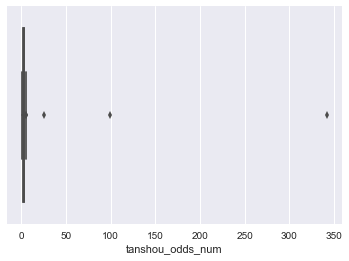

In [48]:
sns.boxplot(x="tanshou_odds_num",data=data.loc[(data["tanshou_flag"]==1) & (data["popularity_num"]==1),:])

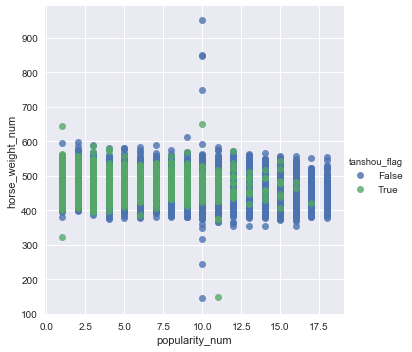

In [43]:
sns.lmplot(x="popularity_num",y="horse_weight_num",hue="tanshou_flag",data=data,fit_reg=False)

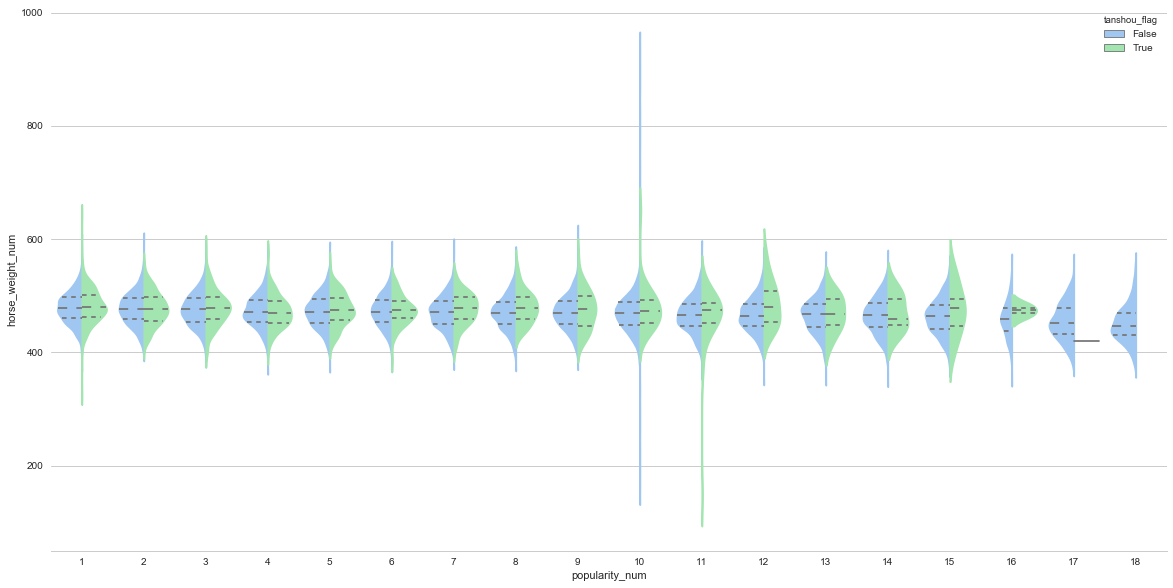

In [58]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(data=data,x="popularity_num", y="horse_weight_num", hue="tanshou_flag",inner="quartile",split=True)
sns.despine(left=True)

decision surface をプロットしてみる

In [75]:


def make_meshgrid(x, y, h=.02):

    """Create a mesh of points to plot in



    Parameters

    ----------

    x: data to base x-axis meshgrid on

    y: data to base y-axis meshgrid on

    h: stepsize for meshgrid, optional



    Returns

    -------

    xx, yy : ndarray

    """

    x_min, x_max = x.min() - 1, x.max() + 1

    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),

                         np.arange(y_min, y_max, h))

    return xx, yy

In [76]:
def plot_contours(ax, clf, xx, yy, **params):

    """Plot the decision boundaries for a classifier.



    Parameters

    ----------

    ax: matplotlib axes object

    clf: a classifier

    xx: meshgrid ndarray

    yy: meshgrid ndarray

    params: dictionary of params to pass to contourf, optional

    """

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    out = ax.contourf(xx, yy, Z, **params)

    return out

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

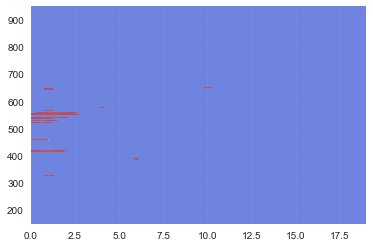

In [37]:
fig, ax = plt.subplots(1,1)

X0 = data.loc[:,"popularity_num"].values
X1 = data.loc[:,"horse_weight_num"].values
xx,yy = make_meshgrid(X0,X1)
plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('popularity')
ax.set_ylabel('horse_weight(kg)')

# パラメータチューニング
cross_validationでパラメータを決める


In [80]:
param_grid = {'C': [ 0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


In [81]:
clf = svm.SVC(probability = True)

In [82]:
grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="precision",verbose=3,n_jobs=-1)

In [83]:
grid_search.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=3)

In [84]:
result = pd.DataFrame(grid_search.cv_results_)
print(result.shape)
result

(16, 22)


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,11.456055,0.306618,0.000000,0.000000,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.195769,0.044466,0.000000,0.000000
1,14.465427,0.403623,0.000000,0.000000,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.376768,0.121801,0.000000,0.000000
2,24.489001,0.918052,0.000000,0.000000,0.01,1,"{'C': 0.01, 'gamma': 1}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.191602,0.339765,0.000000,0.000000
3,26.882538,1.113264,0.000000,0.000000,0.01,10,"{'C': 0.01, 'gamma': 10}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.595797,0.355135,0.000000,0.000000
4,11.638466,0.300217,0.000000,0.000000,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.848367,0.009888,0.000000,0.000000
5,17.700012,0.444825,0.000000,0.000000,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.701588,0.150318,0.000000,0.000000
6,33.726929,1.231270,0.000000,0.000000,0.1,1,"{'C': 0.1, 'gamma': 1}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.818034,0.368998,0.000000,0.000000
7,39.552862,1.400080,0.000000,0.000000,0.1,10,"{'C': 0.1, 'gamma': 10}",7,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.025392,0.455227,0.000000,0.000000
8,17.032174,0.331419,0.000000,1.000000,1,0.01,"{'C': 1, 'gamma': 0.01}",7,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.067892,0.010481,0.000000,0.000000
9,30.545947,0.503429,0.099996,0.969231,1,0.1,"{'C': 1, 'gamma': 0.1}",6,0.000000,1.000000,...,0.000000,1.000000,0.500000,0.846154,0.000000,1.000000,9.582452,0.156325,0.199997,0.061538


In [85]:
param = grid_search.best_params_
param

{'C': 1, 'gamma': 1}

In [86]:
train_y_pred = grid_search.predict(X_train)
test_y_pred = grid_search.predict(X_test)

In [87]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    23434
True        77
dtype: int64
test data の　予測の内訳
False    5855
True       23
dtype: int64


In [88]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21866    25]
 [ 1568    52]]
confusion_matrix in test
[[5441   13]
 [ 414   10]]


In [89]:
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.675324675325
テストデータでの精度＝ 0.434782608696


In [90]:
data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 9.151948051948052


In [92]:
data_train_TP["tanshou_odds_num"]

9619       2.0
10876      1.8
16296     33.0
26790      2.7
15459      2.1
23985      2.5
11215      3.6
13298    342.0
20781      2.2
6029       2.3
21376     99.0
12690      2.4
21259      3.3
1139       3.0
5378       1.7
13587      2.6
8015       1.8
8288       5.6
10300      1.3
5981       2.4
21461      3.0
16800      3.7
16248      1.7
8068       4.9
6993       2.0
16450     73.0
3187       2.5
26417      2.3
3889       1.4
7605       2.0
7547       1.7
14055      1.6
3468       4.3
14375      2.5
20684      4.6
25549      1.9
1087       4.6
12420     10.2
19485      1.9
27650      2.8
9739       3.7
20712      2.3
10243      1.5
24915      1.2
13284     29.0
18351      1.8
9693       3.6
11909      2.7
8413       2.1
9198       2.1
20802      3.4
21404      1.4
Name: tanshou_odds_num, dtype: float64

In [93]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(424, 17)
(10, 17)
test dataの回収率は 1.1869565217391305


In [94]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_flag,predict
21527,715440906,1210250320151213,サンタナブルー,1,1,458,4.5,1.7,3.1,1.9,51,1,1,458,4.5,True,True
26822,715360304,1210422920150719,ミッキーオリビエ,1,1,538,2.7,1.2,2.4,1.1,49,1,1,538,2.7,True,True
21985,515520605,1210269220151108,ナンゴクロマンス,1,1,458,2.3,1.2,4.2,1.9,55,1,1,458,2.3,True,True
13781,416170909,1111009420160521,ザンブローネ,1,2,558,3.2,1.4,6.5,2,53,1,2,558,3.2,True,True
24895,515321209,1110654420150607,メガオパールカフェ,1,1,538,2.5,1.2,3.4,1.5,60,1,1,538,2.5,True,True
6166,816270710,1110608820160220,アーブル,1,1,520,3,1.5,3.8,1.1,53,1,1,520,3.0,True,True
28132,715320103,1310053820150705,クラウンドジャック,1,1,458,1.5,1.1,1.5,1,32,1,1,458,1.5,True,True
14326,116151009,1410620520160813,サトノアリシア,1,1,458,1.8,1.1,2.3,1.1,46,1,1,458,1.8,True,True
19752,415330801,1110261120151024,タマモマズルカ,1,1,528,3.7,1.6,4.6,1.9,53,1,1,528,3.7,True,True
19951,515461009,1211009120151024,モーニン,1,1,520,2.1,1.1,2.6,1.3,69,1,1,520,2.1,True,True


In [ ]:
fig, ax = plt.subplots(1,1)

X0 = data.loc[:,"popularity_num"].values
X1 = data.loc[:,"horse_weight_num"].values
xx,yy = make_meshgrid(X0,X1)
plot_contours(ax, grid_search, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('popularity')
ax.set_ylabel('horse_weight(kg)')